In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import os
import tifffile
import sys

os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
sys.path.insert(1, os.getenv('MOMAPS_HOME'))


In [88]:
untreated_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#52C5D5"], N=256)
stress_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#F7810F"], N=256)
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","white"], N=256)

In [3]:
raw_image_path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s396.tif"

with tifffile.TiffFile(raw_image_path) as tif:
    metadata = tif.pages[0].tags
    site_pixel_size_in_um = metadata.get('UIC1tag').value['XCalibration']

tile_pixel_size_in_um = site_pixel_size_in_um * 1.28


In [7]:
SAVE_PATH = "/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps/outputs/figures/"

In [152]:
from skimage.exposure import rescale_intensity
def improve_brightness(img, contrast_factor, brightness_factor):
    brightness_adjusted = contrast_factor * (img - img.min()) + brightness_factor
    return brightness_adjusted

def improve_brightness_new(img, contrast_factor, brightness_factor):
#     print(img.min())
#     print(img.max())
# # Normalize the image to the 0-1 range
#     img_normalized = (img - img.min()) / (img.max() - img.min())
    
    # Apply contrast and brightness adjustments
    # contrast_adjusted = contrast_factor * img
    
    # img_normalized = (contrast_adjusted - contrast_adjusted.min()) / (contrast_adjusted.max() - contrast_adjusted.min())
    in_range = (0.1,0.8)
    out_range = (0,1)
    img_normalized = rescale_intensity(img, in_range, out_range)
    # img_normalized = (contrast_adjusted - contrast_adjusted.mean()) / (contrast_adjusted.std())
    img_normalized += brightness_factor
    # Clip values to keep them within the 0-1 range
    img_normalized = img_normalized.clip(0, 1)
    
    return img_normalized

In [153]:
def plot_tile(path, tile_index, colormap, tile_pixel_size_in_um, filename, tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0.1):
    site = np.load(path)

    # Adjust contrast and brightness
    brightness_adjusted = improve_brightness_new(img=site[tile_index, :, :, 0], contrast_factor=contrast_factor, brightness_factor=brightness_factor)
    
    fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
    plt.imshow(brightness_adjusted, cmap=colormap)
    plt.axis('off')
    plt.margins = (0,0)
    tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um
    plt.hlines(y=90, xmin=85-tile_scalebar_length_in_pixels, xmax=85, color='white', linewidth=2)
    # plt.text(y = 87.5, x = 85-tile_scalebar_length_in_pixels, 
    #          s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=4, color='white')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.savefig(filename, dpi=127, bbox_inches='tight', pad_inches=0)

In [154]:
# path = '/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch7/TDP43/Untreated/DAPI/rep2_R11_w1confDAPI_s562_panelF_TDP43_processed.npy'
# tile_index = 1
# site = np.load(path)

# # Adjust contrast and brightness
# brightness_adjusted = improve_brightness(img=site[tile_index, :, :, 0], contrast_factor=1, brightness_factor=0.1)

# fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
# plt.imshow(brightness_adjusted, cmap=colormap,vmin=0, vmax=1)
# plt.axis('off')
# plt.margins = (0,0)
# tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um
# plt.hlines(y=90, xmin=85-tile_scalebar_length_in_pixels, xmax=85, color='white', linewidth=2)
# # plt.text(y = 87.5, x = 85-tile_scalebar_length_in_pixels, 
# #          s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=4, color='white')
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)
# plt.show()

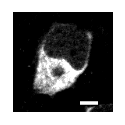

In [158]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/WT/Untreated/G3BP1/rep2_R11_w3confCy5_s369_panelA_WT_processed.npy"
tile_index = 2
plot_tile(path, tile_index, colormap, tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, "neurons_untreated_G3BP1.png"),
                 tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0)


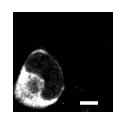

In [159]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/WT/Untreated/G3BP1/rep2_R11_w3confCy5_s369_panelA_WT_processed.npy"
tile_index = 3
plot_tile(path, tile_index, colormap, tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, "neurons_untreated_G3BP1_pos.png"),
                 tile_scalebar_length_in_um=5, contrast_factor = 1.5, brightness_factor = 0)

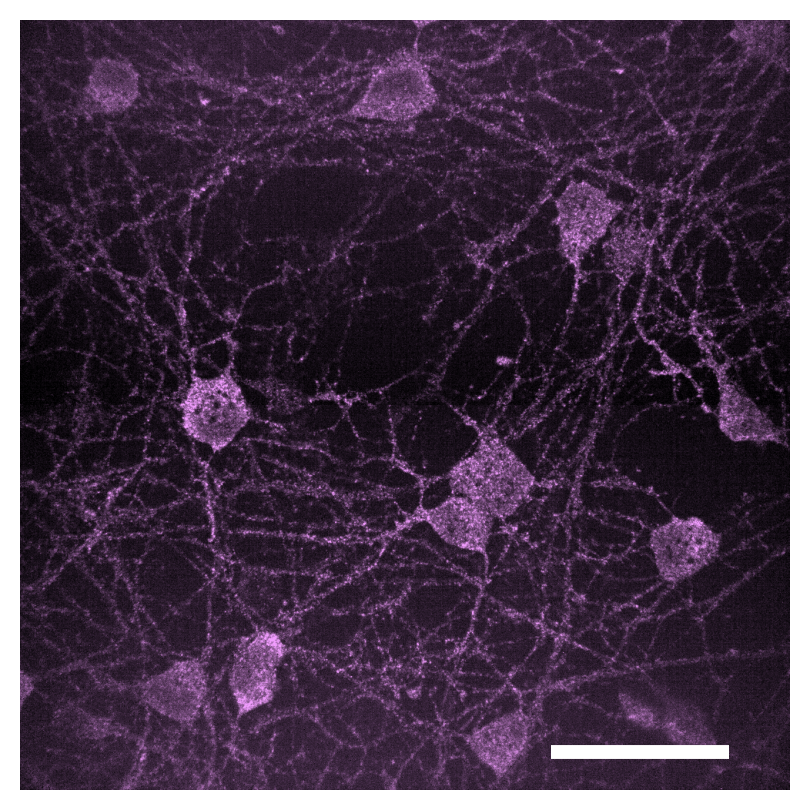

In [16]:
purple_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#f29dff"])
#R11_w3confCy5_s365.tif"
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s396.tif"
image = cv2.imread(path, cv2.IMREAD_ANYDEPTH)
vmin, vmax = np.percentile(image, q=(0.5, 99.9))
img_scaled = skimage.exposure.rescale_intensity(
                                                image[12:1012, 12:1012],
                                                in_range=(vmin, vmax),
                                                out_range=np.float32
    )
dpi=200
fig = plt.figure(figsize=(1000/dpi,1000/dpi), dpi=dpi) #100/dpi,100/dpi
plt.imshow(img_scaled, cmap=purple_colormap, vmin=0, vmax=1)
plt.axis('off')
plt.margins = (0,0)
site_scalebar_length_in_um = 50
site_scalebar_length_in_pixels = site_scalebar_length_in_um / site_pixel_size_in_um
plt.hlines(y=950, xmin=920-site_scalebar_length_in_pixels, xmax=920, color='white', linewidth=5)
#plt.text(y = 990, x = 950-site_scalebar_length_in_pixels, s=f"{site_scalebar_length_in_um} \u03BCm", fontsize=15, color='white')
#plt.savefig(os.path.join(SAVE_PATH, "neurons/neurons_untreated_PSD95.eps"),bbox_inches='tight', dpi=dpi, pad_inches=0)
plt.show()

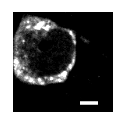

In [160]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch6/WT/stress/G3BP1/rep1_R11_w3confCy5_s30_panelA_WT_processed.npy"
tile_index = 4
plot_tile(path, tile_index, colormap, tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, "neurons_stress_G3BP1.png"),
                 tile_scalebar_length_in_um=5, contrast_factor = 10, brightness_factor = 0)

In [11]:
# raw_u20s_path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/220714/U2OS/unstressed/220714_U2OS_unstressed-DAPI_Phalloidin_G3BP1_DCP1A-01.tif"
# import aicsimageio
# reader = aicsimageio.AICSImage(czi_path)
# reader.physical_pixel_sizes
u2os_site_pixel_size_in_um = 0.1376020331244211
u2os_tile_scalebar_length_in_um = 20
u2os_tile_pixel_size_in_um = u2os_site_pixel_size_in_um *6
u2os_tile_scalebar_length_in_pixels = u2os_tile_scalebar_length_in_um / u2os_tile_pixel_size_in_um
#    print(site_pixel_size_in_um)

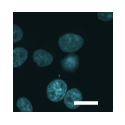

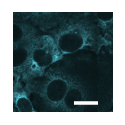

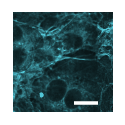

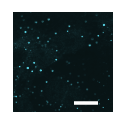

In [31]:
for marker in os.listdir("/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/220714/U2OS/unstressed/"):
    u2os = f"/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/220714/U2OS/unstressed/{marker}/220714_U2OS_unstressed-DAPI_Phalloidin_G3BP1_DCP1A-01_U2OS.tif_processed"
    tile_index=6
    plot_tile(u2os, tile_index, untreated_colormap, tile_pixel_size_in_um=u2os_tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, f"U2OS/u2os_untreated_{marker}.eps"),
                 tile_scalebar_length_in_um=u2os_tile_scalebar_length_in_um, contrast_factor = 1.5, brightness_factor = 0.1)

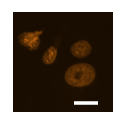

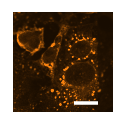

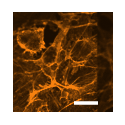

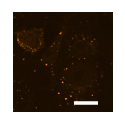

In [32]:
for marker in os.listdir("/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/220714/U2OS/stressed/"):
    u2os = f"/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/220714/U2OS/stressed/{marker}/220714_U2OS_stressed-DAPI_Phalloidin_G3BP1_DCP1A-01_U2OS.tif_processed"
    tile_index=6
    plot_tile(u2os, tile_index, stress_colormap, tile_pixel_size_in_um=u2os_tile_pixel_size_in_um, 
                 filename=os.path.join(SAVE_PATH, f"U2OS/u2os_stress_{marker}.eps"),
                 tile_scalebar_length_in_um=u2os_tile_scalebar_length_in_um, contrast_factor = 1.5, brightness_factor = 0.1)